In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# OR Hospital Prices Data

In [2]:
data=pd.read_csv("./OR_hos_prices1.csv")
data.head()

,Hospital,address,lat,long,Cardiovascular: Electrophysiology,Thyroidectomy,Nuclear Medicine: Musculoskeletal,Central Line,Breast Reconstruction,Arthorcentesis,...,CT scan: Head and Neck,Radiation Treatment: Guidance,MRI: Head and Neck,Cesarean Section with complications,Cardiovascular: Echocardiography,CT scan: Chest,Hysteroscopy,CVC Insertion,Breast Biopsy,Tonsillectomy
0,Mid-Columbia Medical Center,"1700 E 19th St, The Dalles, OR 97058, USA",45.587210,-121.164857,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2078.0,NaN,NaN,NaN,NaN,NaN
1,Asante Three Rivers Medical Center,"500 SW Ramsey Ave, Grants Pass, OR 97527, USA",42.421363,-123.342914,NaN,NaN,1384.0,NaN,NaN,931.0,...,468.0,NaN,NaN,NaN,1595.0,468.0,6397.0,6704.0,3864.0,5434.0
2,Providence St Vincent Medical Center,"9205 SW Barnes Rd, Portland, OR 97225, USA",45.510438,-122.771628,39084.0,14045.0,593.0,22032.0,7133.0,655.0,...,506.0,683.0,569.0,19183.0,1354.0,242.0,4900.0,4900.0,3319.0,5180.0
3,Asante Ashland Community Hospital,"280 Maple St, Ashland, OR 97520, USA",42.205650,-122.724803,NaN,NaN,NaN,NaN,NaN,NaN,...,1032.0,NaN,NaN,NaN,1635.0,1408.0,NaN,NaN,3573.0,NaN
4,Legacy Emanuel Medical Center,"2801 N Gantenbein Ave, Portland, OR 97227, USA",45.544170,-122.669685,48813.0,12222.0,NaN,48628.0,NaN,NaN,...,433.0,NaN,835.0,15733.0,1273.0,NaN,NaN,NaN,NaN,6599.0


In [3]:
data.tail()

,Hospital,address,lat,long,Cardiovascular: Electrophysiology,Thyroidectomy,Nuclear Medicine: Musculoskeletal,Central Line,Breast Reconstruction,Arthorcentesis,...,CT scan: Head and Neck,Radiation Treatment: Guidance,MRI: Head and Neck,Cesarean Section with complications,Cardiovascular: Echocardiography,CT scan: Chest,Hysteroscopy,CVC Insertion,Breast Biopsy,Tonsillectomy
54,Grande Ronde Hospital,"900 Sunset Dr, La Grande, OR 97850, USA",45.319655,-118.106256,NaN,NaN,NaN,NaN,NaN,NaN,...,733.0,NaN,2034.0,NaN,1326.0,1355.0,NaN,NaN,3526.0,7236.0
55,Curry General Hospital,"94220 4th St, Gold Beach, OR 97444, USA",42.411316,-124.418507,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1544.0,NaN,NaN,NaN,NaN,NaN
56,Samaritan Lebanon Community Hospital,"525 Santiam Hwy SE, Lebanon, OR 97355, USA",44.550870,-122.907072,NaN,NaN,1068.0,NaN,NaN,NaN,...,1209.0,NaN,NaN,NaN,1273.0,1465.0,NaN,NaN,NaN,NaN
57,St Charles Madras,"470 NE A St, Madras, OR 97741, USA",44.638219,-121.120911,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,870.0,NaN,NaN,NaN,NaN,NaN
58,Good Shepherd Medical Center,"610 NW 11th Street Hermiston, OR 97838 Umatill...",45.831867,-119.371871,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2699.0,NaN,1913.0,NaN,NaN,NaN,NaN,4768.0


In [4]:
data.describe()

,lat,long,Cardiovascular: Electrophysiology,Thyroidectomy,Nuclear Medicine: Musculoskeletal,Central Line,Breast Reconstruction,Arthorcentesis,CT scan with contrast: Head and Neck,Radiation Treatment: Consult,...,CT scan: Head and Neck,Radiation Treatment: Guidance,MRI: Head and Neck,Cesarean Section with complications,Cardiovascular: Echocardiography,CT scan: Chest,Hysteroscopy,CVC Insertion,Breast Biopsy,Tonsillectomy
count,59.000000,59.000000,11.000000,12.000000,23.000000,12.000000,10.000000,19.000000,30.000000,15.000000,...,40.000000,6.000000,29.000000,24.000000,51.000000,31.000000,28.000000,17.000000,25.00000,22.000000
mean,44.546106,-122.197845,40711.181818,13470.416667,973.608696,28375.083333,14317.000000,785.473684,1050.333333,390.000000,...,632.175000,503.166667,1128.551724,18226.333333,1419.176471,630.032258,7002.107143,5908.352941,3073.32000,5642.000000
std,1.117346,1.860036,10712.278841,2873.445713,302.569412,8041.677329,4921.579805,331.435995,462.341815,188.866166,...,343.686417,199.626067,645.279485,3391.453115,318.677436,401.108421,1659.946392,1839.983490,743.10563,1004.485701
min,42.181334,-124.418507,15994.000000,6533.000000,432.000000,16938.000000,5300.000000,298.000000,314.000000,123.000000,...,171.000000,255.000000,304.000000,8867.000000,862.000000,233.000000,4692.000000,1567.000000,1661.00000,3424.000000
25%,43.999695,-123.208499,38199.500000,12217.250000,788.000000,24352.500000,13188.500000,633.000000,700.000000,311.500000,...,343.000000,324.000000,770.000000,15984.500000,1255.000000,343.000000,5865.750000,4900.000000,2899.00000,4977.750000
50%,44.804934,-122.785047,40627.000000,13404.500000,1015.000000,28053.500000,15085.000000,678.000000,1003.000000,352.000000,...,496.500000,576.500000,837.000000,18139.500000,1354.000000,477.000000,6901.500000,5908.000000,3161.00000,5379.500000
75%,45.477740,-121.396965,45457.000000,15697.750000,1127.000000,30866.250000,17868.500000,938.500000,1434.000000,471.000000,...,955.250000,660.250000,1518.000000,20088.500000,1610.000000,750.000000,8211.000000,7086.000000,3526.00000,6257.000000
max,46.187946,-116.976891,57677.000000,16916.000000,1453.000000,48628.000000,20482.000000,1775.000000,1986.000000,817.000000,...,1305.000000,683.000000,2699.000000,25287.000000,2110.000000,1465.000000,11439.000000,9097.000000,5034.00000,7745.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 84 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Hospital                                         59 non-null     object 
 1   address                                          59 non-null     object 
 2   lat                                              59 non-null     float64
 3   long                                             59 non-null     float64
 4   Cardiovascular: Electrophysiology                11 non-null     float64
 5   Thyroidectomy                                    12 non-null     float64
 6   Nuclear Medicine: Musculoskeletal                23 non-null     float64
 7   Central Line                                     12 non-null     float64
 8   Breast Reconstruction                            10 non-null     float64
 9   Arthorcentesis                    

In [6]:
OR_map=folium.Map(location=[44.0, -120.50],zoom_start = 6)
OR_map

In [7]:
data.fillna(0)

,Hospital,address,lat,long,Cardiovascular: Electrophysiology,Thyroidectomy,Nuclear Medicine: Musculoskeletal,Central Line,Breast Reconstruction,Arthorcentesis,...,CT scan: Head and Neck,Radiation Treatment: Guidance,MRI: Head and Neck,Cesarean Section with complications,Cardiovascular: Echocardiography,CT scan: Chest,Hysteroscopy,CVC Insertion,Breast Biopsy,Tonsillectomy
0,Mid-Columbia Medical Center,"1700 E 19th St, The Dalles, OR 97058, USA",45.587210,-121.164857,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2078.0,0.0,0.0,0.0,0.0,0.0
1,Asante Three Rivers Medical Center,"500 SW Ramsey Ave, Grants Pass, OR 97527, USA",42.421363,-123.342914,0.0,0.0,1384.0,0.0,0.0,931.0,...,468.0,0.0,0.0,0.0,1595.0,468.0,6397.0,6704.0,3864.0,5434.0
2,Providence St Vincent Medical Center,"9205 SW Barnes Rd, Portland, OR 97225, USA",45.510438,-122.771628,39084.0,14045.0,593.0,22032.0,7133.0,655.0,...,506.0,683.0,569.0,19183.0,1354.0,242.0,4900.0,4900.0,3319.0,5180.0
3,Asante Ashland Community Hospital,"280 Maple St, Ashland, OR 97520, USA",42.205650,-122.724803,0.0,0.0,0.0,0.0,0.0,0.0,...,1032.0,0.0,0.0,0.0,1635.0,1408.0,0.0,0.0,3573.0,0.0
4,Legacy Emanuel Medical Center,"2801 N Gantenbein Ave, Portland, OR 97227, USA",45.544170,-122.669685,48813.0,12222.0,0.0,48628.0,0.0,0.0,...,433.0,0.0,835.0,15733.0,1273.0,0.0,0.0,0.0,0.0,6599.0
5,OHSU Hospital,"3181 SW Sam Jackson Park Rd, Portland, OR 9723...",45.498920,-122.686564,34505.0,12203.0,925.0,25126.0,15907.0,636.0,...,728.0,531.0,833.0,17799.0,1270.0,590.0,5865.0,5908.0,3068.0,4975.0
6,Good Samaritan Regional Medical Center,"3600 NW Samaritan Dr, Corvallis, OR 97330, USA",44.603791,-123.252300,40627.0,16109.0,1082.0,28054.0,0.0,0.0,...,496.0,255.0,0.0,23488.0,1312.0,496.0,8211.0,0.0,0.0,6242.0
7,Legacy Good Samaritan Medical Center,"1015 NW 22nd Ave, Portland, OR 97210, USA",45.530559,-122.698216,40627.0,16108.0,1015.0,28053.0,18441.0,1051.0,...,343.0,255.0,835.0,15737.0,1312.0,343.0,8211.0,6862.0,3161.0,6242.0
8,Asante Rogue Regional Medical center,"2825 E Barnett Rd, Medford, OR 97504, USA",42.317610,-122.830583,42101.0,16916.0,1406.0,28648.0,0.0,946.0,...,476.0,0.0,1156.0,20046.0,1620.0,476.0,7257.0,7349.0,3621.0,0.0
9,McKenzie-Willamette Medical Center,"1460 G St, Springfield, OR 97477, USA",44.053382,-123.003156,0.0,0.0,0.0,0.0,0.0,0.0,...,461.0,0.0,1354.0,18021.0,1980.0,0.0,8366.0,4173.0,0.0,0.0


In [8]:
d=data.drop(columns=['lat','long'])
d['Total']=d.sum(axis=1)
d

,Hospital,address,Cardiovascular: Electrophysiology,Thyroidectomy,Nuclear Medicine: Musculoskeletal,Central Line,Breast Reconstruction,Arthorcentesis,CT scan with contrast: Head and Neck,Radiation Treatment: Consult,...,Radiation Treatment: Guidance,MRI: Head and Neck,Cesarean Section with complications,Cardiovascular: Echocardiography,CT scan: Chest,Hysteroscopy,CVC Insertion,Breast Biopsy,Tonsillectomy,Total
0,Mid-Columbia Medical Center,"1700 E 19th St, The Dalles, OR 97058, USA",NaN,NaN,NaN,NaN,NaN,NaN,1986.0,611.0,...,NaN,NaN,NaN,2078.0,NaN,NaN,NaN,NaN,NaN,80742.0
1,Asante Three Rivers Medical Center,"500 SW Ramsey Ave, Grants Pass, OR 97527, USA",NaN,NaN,1384.0,NaN,NaN,931.0,986.0,447.0,...,NaN,NaN,NaN,1595.0,468.0,6397.0,6704.0,3864.0,5434.0,261066.0
2,Providence St Vincent Medical Center,"9205 SW Barnes Rd, Portland, OR 97225, USA",39084.0,14045.0,593.0,22032.0,7133.0,655.0,506.0,136.0,...,683.0,569.0,19183.0,1354.0,242.0,4900.0,4900.0,3319.0,5180.0,587196.0
3,Asante Ashland Community Hospital,"280 Maple St, Ashland, OR 97520, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1635.0,1408.0,NaN,NaN,3573.0,NaN,59996.0
4,Legacy Emanuel Medical Center,"2801 N Gantenbein Ave, Portland, OR 97227, USA",48813.0,12222.0,NaN,48628.0,NaN,NaN,1435.0,NaN,...,NaN,835.0,15733.0,1273.0,NaN,NaN,NaN,NaN,6599.0,440587.0
5,OHSU Hospital,"3181 SW Sam Jackson Park Rd, Portland, OR 9723...",34505.0,12203.0,925.0,25126.0,15907.0,636.0,903.0,352.0,...,531.0,833.0,17799.0,1270.0,590.0,5865.0,5908.0,3068.0,4975.0,662776.0
6,Good Samaritan Regional Medical Center,"3600 NW Samaritan Dr, Corvallis, OR 97330, USA",40627.0,16109.0,1082.0,28054.0,NaN,NaN,1045.0,432.0,...,255.0,NaN,23488.0,1312.0,496.0,8211.0,NaN,NaN,6242.0,700007.0
7,Legacy Good Samaritan Medical Center,"1015 NW 22nd Ave, Portland, OR 97210, USA",40627.0,16108.0,1015.0,28053.0,18441.0,1051.0,731.0,343.0,...,255.0,835.0,15737.0,1312.0,343.0,8211.0,6862.0,3161.0,6242.0,762626.0
8,Asante Rogue Regional Medical center,"2825 E Barnett Rd, Medford, OR 97504, USA",42101.0,16916.0,1406.0,28648.0,NaN,946.0,1001.0,817.0,...,NaN,1156.0,20046.0,1620.0,476.0,7257.0,7349.0,3621.0,NaN,692245.0
9,McKenzie-Willamette Medical Center,"1460 G St, Springfield, OR 97477, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1354.0,18021.0,1980.0,NaN,8366.0,4173.0,NaN,NaN,462587.0


In [9]:
data2=d.sort_values(by='Total',ascending=False)[:30]
data2

,Hospital,address,Cardiovascular: Electrophysiology,Thyroidectomy,Nuclear Medicine: Musculoskeletal,Central Line,Breast Reconstruction,Arthorcentesis,CT scan with contrast: Head and Neck,Radiation Treatment: Consult,...,Radiation Treatment: Guidance,MRI: Head and Neck,Cesarean Section with complications,Cardiovascular: Echocardiography,CT scan: Chest,Hysteroscopy,CVC Insertion,Breast Biopsy,Tonsillectomy,Total
7,Legacy Good Samaritan Medical Center,"1015 NW 22nd Ave, Portland, OR 97210, USA",40627.0,16108.0,1015.0,28053.0,18441.0,1051.0,731.0,343.0,...,255.0,835.0,15737.0,1312.0,343.0,8211.0,6862.0,3161.0,6242.0,762626.0
19,St Charles Bend,"2500 NE Neff Rd, Bend, OR 97701, USA",57677.0,15210.0,NaN,31347.0,16151.0,NaN,NaN,469.0,...,673.0,NaN,23027.0,910.0,NaN,9653.0,7937.0,NaN,5325.0,727058.0
6,Good Samaritan Regional Medical Center,"3600 NW Samaritan Dr, Corvallis, OR 97330, USA",40627.0,16109.0,1082.0,28054.0,NaN,NaN,1045.0,432.0,...,255.0,NaN,23488.0,1312.0,496.0,8211.0,NaN,NaN,6242.0,700007.0
8,Asante Rogue Regional Medical center,"2825 E Barnett Rd, Medford, OR 97504, USA",42101.0,16916.0,1406.0,28648.0,NaN,946.0,1001.0,817.0,...,NaN,1156.0,20046.0,1620.0,476.0,7257.0,7349.0,3621.0,NaN,692245.0
5,OHSU Hospital,"3181 SW Sam Jackson Park Rd, Portland, OR 9723...",34505.0,12203.0,925.0,25126.0,15907.0,636.0,903.0,352.0,...,531.0,833.0,17799.0,1270.0,590.0,5865.0,5908.0,3068.0,4975.0,662776.0
2,Providence St Vincent Medical Center,"9205 SW Barnes Rd, Portland, OR 97225, USA",39084.0,14045.0,593.0,22032.0,7133.0,655.0,506.0,136.0,...,683.0,569.0,19183.0,1354.0,242.0,4900.0,4900.0,3319.0,5180.0,587196.0
15,PeaceHealth Sacred Heart Medical Center Univer...,"1255 Hilyard St, Eugene, OR 97401, USA",NaN,NaN,NaN,34743.0,NaN,NaN,NaN,NaN,...,NaN,NaN,25287.0,NaN,NaN,NaN,NaN,NaN,NaN,555047.0
21,Salem Hospital,"B, 665 Winter St SE, Salem, OR 97301, USA",51996.0,6533.0,995.0,16938.0,13373.0,549.0,1026.0,123.0,...,NaN,1038.0,8867.0,891.0,495.0,6219.0,7409.0,3128.0,NaN,502655.0
25,Providence Portland Medical Center,"4805 NE Glisan St, Portland, OR 97213, USA",NaN,11241.0,432.0,30706.0,5300.0,629.0,397.0,135.0,...,622.0,548.0,18776.0,1290.0,249.0,4921.0,5407.0,3079.0,5276.0,482708.0
31,Kaiser Sunnyside Medical Center,"10180 SE Sunnyside Rd, Clackamas, OR 97015, USA",15994.0,12764.0,913.0,20980.0,13127.0,646.0,700.0,NaN,...,NaN,658.0,17683.0,1119.0,524.0,NaN,3533.0,1661.0,NaN,479801.0


In [10]:
data2['long']=data['long']
data2['lat']=data['lat']
data2.head()

,Hospital,address,Cardiovascular: Electrophysiology,Thyroidectomy,Nuclear Medicine: Musculoskeletal,Central Line,Breast Reconstruction,Arthorcentesis,CT scan with contrast: Head and Neck,Radiation Treatment: Consult,...,Cesarean Section with complications,Cardiovascular: Echocardiography,CT scan: Chest,Hysteroscopy,CVC Insertion,Breast Biopsy,Tonsillectomy,Total,long,lat
7,Legacy Good Samaritan Medical Center,"1015 NW 22nd Ave, Portland, OR 97210, USA",40627.0,16108.0,1015.0,28053.0,18441.0,1051.0,731.0,343.0,...,15737.0,1312.0,343.0,8211.0,6862.0,3161.0,6242.0,762626.0,-122.698216,45.530559
19,St Charles Bend,"2500 NE Neff Rd, Bend, OR 97701, USA",57677.0,15210.0,NaN,31347.0,16151.0,NaN,NaN,469.0,...,23027.0,910.0,NaN,9653.0,7937.0,NaN,5325.0,727058.0,-121.269455,44.067886
6,Good Samaritan Regional Medical Center,"3600 NW Samaritan Dr, Corvallis, OR 97330, USA",40627.0,16109.0,1082.0,28054.0,NaN,NaN,1045.0,432.0,...,23488.0,1312.0,496.0,8211.0,NaN,NaN,6242.0,700007.0,-123.252300,44.603791
8,Asante Rogue Regional Medical center,"2825 E Barnett Rd, Medford, OR 97504, USA",42101.0,16916.0,1406.0,28648.0,NaN,946.0,1001.0,817.0,...,20046.0,1620.0,476.0,7257.0,7349.0,3621.0,NaN,692245.0,-122.830583,42.317610
5,OHSU Hospital,"3181 SW Sam Jackson Park Rd, Portland, OR 9723...",34505.0,12203.0,925.0,25126.0,15907.0,636.0,903.0,352.0,...,17799.0,1270.0,590.0,5865.0,5908.0,3068.0,4975.0,662776.0,-122.686564,45.498920


In [12]:
lat=data2['lat']
long=data2['long']
label=data2['address'] + data2['Total'].astype(str)
a = folium.map.FeatureGroup()
for lat,long, label in zip(lat,long,label):
    folium.Marker([lat,long],tooltip=label, radius=10).add_to(OR_map)
OR_map.add_child(a)

# Weather Data

In [13]:
df=pd.read_csv('./weather.csv')
df.head()

,timestamp,Hà Nội Temperature [2 m elevation corrected],Hà Nội Precipitation Total,Hà Nội Wind Speed [10 m],Hà Nội Wind Direction [10 m]
0,20201010T0000,23.14182,0.0,12.287555,5.042450
1,20201010T0100,22.37182,0.0,14.799459,355.815060
2,20201010T0200,21.89182,0.0,16.203999,358.727000
3,20201010T0300,21.37182,0.0,17.283749,1.193466
4,20201010T0400,20.89182,0.0,18.391735,3.366440


In [14]:
df.tail()

,timestamp,Hà Nội Temperature [2 m elevation corrected],Hà Nội Precipitation Total,Hà Nội Wind Speed [10 m],Hà Nội Wind Direction [10 m]
187,20201017T1900,20.711820,0.0,30.903435,351.964300
188,20201017T2000,20.941822,0.0,31.682047,359.348940
189,20201017T2100,21.191822,0.0,32.886350,5.024078
190,20201017T2200,21.451820,0.0,34.597477,12.011490
191,20201017T2300,21.391820,0.0,34.597477,12.011490


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   timestamp                                     192 non-null    object 
 1   Hà Nội Temperature [2 m elevation corrected]  192 non-null    float64
 2   Hà Nội Precipitation Total                    192 non-null    float64
 3   Hà Nội Wind Speed [10 m]                      192 non-null    float64
 4   Hà Nội Wind Direction [10 m]                  192 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.6+ KB


In [16]:
df.describe()

,Hà Nội Temperature [2 m elevation corrected],Hà Nội Precipitation Total,Hà Nội Wind Speed [10 m],Hà Nội Wind Direction [10 m]
count,192.000000,192.000000,192.000000,192.000000
mean,24.110623,0.038021,24.977717,110.959464
std,2.653338,0.150261,9.960408,148.243204
min,19.361822,0.000000,2.189795,0.616058
25%,22.296821,0.000000,18.070958,9.873730
50%,23.376821,0.000000,23.131178,25.453063
75%,25.614321,0.000000,31.496817,344.112667
max,30.861822,1.100000,46.282060,360.000000


In [17]:
df['timestamp']=pd.to_datetime(df.timestamp)
df.head()

,timestamp,Hà Nội Temperature [2 m elevation corrected],Hà Nội Precipitation Total,Hà Nội Wind Speed [10 m],Hà Nội Wind Direction [10 m]
0,2020-10-10 00:00:00,23.14182,0.0,12.287555,5.042450
1,2020-10-10 01:00:00,22.37182,0.0,14.799459,355.815060
2,2020-10-10 02:00:00,21.89182,0.0,16.203999,358.727000
3,2020-10-10 03:00:00,21.37182,0.0,17.283749,1.193466
4,2020-10-10 04:00:00,20.89182,0.0,18.391735,3.366440


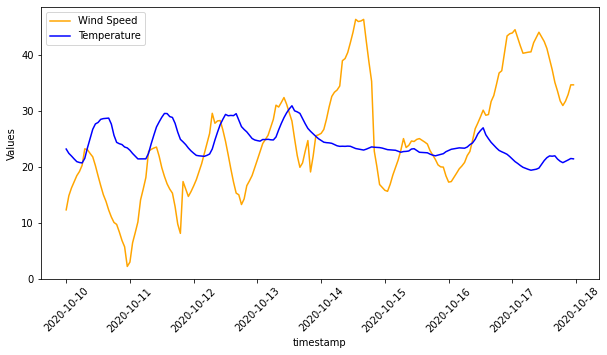

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="timestamp", y="Hà Nội Wind Speed [10 m]", label='Wind Speed', color='orange')
sns.lineplot(data=df, x="timestamp", y="Hà Nội Temperature [2 m elevation corrected]",label='Temperature', color='b')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.show()

Nhìn vào biểu đồ, ta thấy:
- Tốc độ gió và nhiệt độ có xu hướng đối nghịch nhau
- Tốc độ gió có xu hướng tăng dần theo thời gian, đạt đỉnh điểm vào ngày 14-15/10/2020 và thấp nhất vào ngày 11/10/2020
- Nhiệt độ giảm khi tốc độ gió tăng cao, cao nhất vào ngày 13/10/2020, thấp nhất vào ngày 17/10/2020

# Shopee Rating Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [20]:
data=pd.read_csv('./banh_keo_ratings.csv')
data.head()

,username,rating,comment,sp
0,t*****9,5,Bạn nào nghiện mua hàng online như mình thì nê...,[HCM] NESCAFE Café Cà phê sữa đá 200gam/hộp (1...
1,l*****5,5,Hfwdbiffjoyesgnoydchjtecnkuedhkuewcjiyrgjutfhu...,[HCM] NESCAFE Café Cà phê sữa đá 200gam/hộp (1...
2,nguyennguyenchon123,5,"Chất lượng sản phẩm ngon tuyệt vời, đóng gói s...",[HCM] NESCAFE Café Cà phê sữa đá 200gam/hộp (1...
3,truyen0101,5,"Chất lượng sản phẩm tuyệt vời, đóng gói sản ph...",[HCM] NESCAFE Café Cà phê sữa đá 200gam/hộp (1...
4,buinamdinh78,5,"Giao hàng nhanh, nhân viên giao hàng thân thiê...",[HCM] NESCAFE Café Cà phê sữa đá 200gam/hộp (1...


In [21]:
data.tail()

,username,rating,comment,sp
138,n*****g,5,Cà fee vị sô cô la. Trẻ con cũng thích. Hàng y...,[HN] Hộp 10 gói x 20g NESCAFE Cà Phê Sô Cô La
139,h*****9,5,Hậhgajbshsjahahvajqkhwgwhdvbzznbshsnwgahahwbsb...,[HN] Hộp 10 gói x 20g NESCAFE Cà Phê Sô Cô La
140,hanhmeo1112222,5,Nsnsnmmckwnnvmmdmdmnfnnannsncncnnanxnncmckwksk...,[HN] Hộp 10 gói x 20g NESCAFE Cà Phê Sô Cô La
141,dungngow,5,Trồng cây và mua được sản phẩm với giá 0 đ. C...,[HN] Hộp 10 gói x 20g NESCAFE Cà Phê Sô Cô La
142,d*****7,5,Chơi nông trại shopee trồng được nên không mất...,[HN] Hộp 10 gói x 20g NESCAFE Cà Phê Sô Cô La


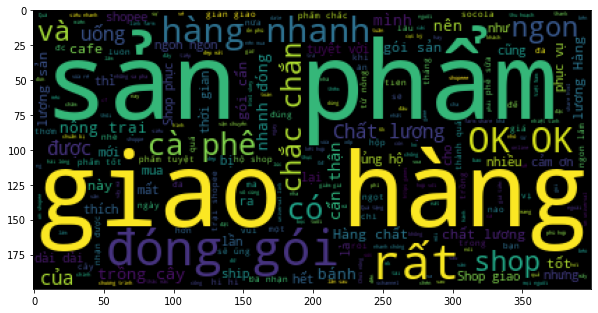

In [22]:
wc = WordCloud(background_color='black',
             max_words=500)
wc.generate(','.join(data.comment))
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.show()

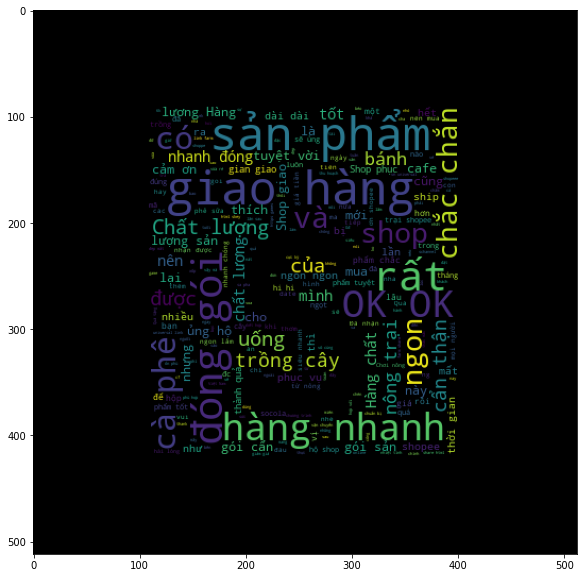

In [23]:
wc_mask=np.array(Image.open('shopee.png'))
# plt.imshow(wc_mask)
wc1 = WordCloud(background_color='black',
             max_words=500,mask=wc_mask)
wc1.generate(','.join(data.comment))
plt.figure(figsize=(10,10))
plt.imshow(wc1)
plt.show()

In [24]:
df=pd.read_excel('./shopee_data.xlsx')
df.head(5)

,Unnamed: 0,Tên sp:,label:,Danh Mục,Kho hàng,Gửi từ,sale_price,org_price,discount,star,...,img_url,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI,ThỜI Gian PhẢN HỒI,Tham Gia,NgƯờI Theo DÕI,Thương hiệu,Bảo Hành
0,0,Sạc đa năng laptop,May_tinh_&_Laptop,Shopee-Máy tính & Laptop,100,"Quận Cầu Giấy, Hà Nội",115000,115000,0.00,0.0,...,"""https://cf.shopee.vn/file/25c4ee019c051cb3829...",0,41,127,1.00,trong vài giờ,33 tháng trước,"1,5k",NaN,NaN
1,1,Lót chuột - Pad chuột máy tính (11 họa tiết kh...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Bàn D...",694,"Quận Hoàng Mai, Hà Nội",25000,25000,0.00,4.8,...,NaN,308,478,113,0.83,trong vài ngày,12 tháng trước,"3,8k",no brand,Không Bảo Hành
2,2,Chuột Dây Asus Sica Gaming P301,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Chuột...",5,"Quận Thủ Đức, TP. Hồ Chí Minh",380000,590000,0.36,0.0,...,"""https://cf.shopee.vn/file/46e5adc31cf7f23404c...",0,19,130,1.00,trong vài giờ,3 tháng trước,"4,4k",asus,NaN
3,3,[PHÂN PHỐI] Bút thuyết trình chính hãng 1 đổi 1,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",49699,"Quận Phú Nhuận, TP. Hồ Chí Minh",299000,450000,0.34,5.0,...,"""https://cf.shopee.vn/file/6f9fae7be7f3b6cca1e...",301,51,8,0.86,trong vài ngày,2 tháng trước,"10,5k",logitech,3 tháng
4,4,Máy chiếu Led Salange M18-2020 1080P 15w đã sử...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",100,"Thành Phố Thái Nguyên, Thái Nguyên",3590000,5500000,0.35,0.0,...,"""https://cf.shopee.vn/file/bd3906cfa7a6a224f7f...",0,34,37,0.93,trong vài ngày,14 tháng trước,"6,8k",no brand,10 tháng


In [25]:
df.tail(5)

,Unnamed: 0,Tên sp:,label:,Danh Mục,Kho hàng,Gửi từ,sale_price,org_price,discount,star,...,img_url,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI,ThỜI Gian PhẢN HỒI,Tham Gia,NgƯờI Theo DÕI,Thương hiệu,Bảo Hành
499,500,Bộ kích sóng wifi Mercury MW310re 300Mbps 3 râ...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ Kích...,249,"Quận Hoàng Mai, Hà Nội",169000,199000,0.15,4.7,...,NaN,4300,3200,130,0.96,trong vài ngày,24 tháng trước,844,mercury,12 tháng
500,501,Bộ Chia Mạng Switch 16 Cổng Linksys LGS116 Tốc...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ chia...,10,"Quận Bình Tân, TP. Hồ Chí Minh",2399000,2899000,0.17,0.0,...,"""https://cf.shopee.vn/file/118c26e35d3d7545cf7...",0,10,68,0.79,trong vài giờ,4 năm trước,"3,3k",linksys,36 tháng
501,502,Bộ Chia Mạng Switch 24 Cổng Linksys LGS124 Tốc...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ chia...,10,"Quận Bình Tân, TP. Hồ Chí Minh",3099000,3399000,0.09,0.0,...,"""https://cf.shopee.vn/file/79fce7931a0214952e5...",0,10,68,0.79,trong vài giờ,4 năm trước,"3,3k",linksys,36 tháng
502,503,Bộ Phát Wifi Mesh MU-MIMO Linksys MR8300 Chuản...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ Phát...,10,"Quận Bình Tân, TP. Hồ Chí Minh",3899000,5100000,0.24,0.0,...,"""https://cf.shopee.vn/file/86f635933668b67d795...",0,10,68,0.79,trong vài giờ,4 năm trước,"3,3k",linksys,36 tháng
503,504,Bộ phát Wifi MU-MIMO Linksys EA8500 Max-Strea...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Thiết Bị Mạng-Bộ Phát...,10,"Quận Bình Tân, TP. Hồ Chí Minh",6499000,7499000,0.13,0.0,...,"""https://cf.shopee.vn/file/900d5afcd0e56f1358a...",0,10,68,0.79,trong vài giờ,4 năm trước,"3,3k",linksys,36 tháng


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          504 non-null    int64  
 1   Tên sp:             504 non-null    object 
 2   label:              504 non-null    object 
 3   Danh Mục            504 non-null    object 
 4   Kho hàng            504 non-null    int64  
 5   Gửi từ              503 non-null    object 
 6   sale_price          504 non-null    int64  
 7   org_price           504 non-null    int64  
 8   discount            504 non-null    float64
 9   star                504 non-null    float64
 10  rating              504 non-null    object 
 11  img_url             464 non-null    object 
 12  selled              504 non-null    int64  
 13  ĐáNh GiÁ            504 non-null    int64  
 14  SẢN PhẨM            504 non-null    int64  
 15  TỈ LỆ PhẢN HỒI      504 non-null    float64
 16  ThỜI Gia

In [27]:
df.describe()

,Unnamed: 0,Kho hàng,sale_price,org_price,discount,star,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI
count,504.000000,504.000000,5.040000e+02,5.040000e+02,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,251.819444,833.158730,1.092297e+06,1.225891e+06,0.087579,1.652381,96.722222,1371.533730,333.501984,0.939524
std,146.013715,6517.507065,1.996300e+06,2.201766e+06,0.133548,2.312313,528.437355,17186.431638,448.062664,0.137247
min,0.000000,1.000000,6.400000e+03,6.400000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.040000
25%,125.750000,10.000000,9.650000e+04,1.100000e+05,0.000000,0.000000,0.000000,41.000000,79.000000,0.940000
50%,251.500000,50.000000,2.550000e+05,2.775000e+05,0.000000,0.000000,0.000000,108.000000,216.000000,0.990000
75%,378.250000,100.000000,8.990000e+05,1.051000e+06,0.152500,4.900000,4.000000,552.750000,308.250000,1.000000
max,504.000000,99067.000000,1.499000e+07,1.499000e+07,0.550000,5.000000,6500.000000,383600.000000,2100.000000,1.000000


In [28]:
df.shape
print('so luong dong la', df.shape[0])
print('so luong cot la', df.shape[1])

so luong dong la 504
so luong cot la 21


In [29]:
df['Thương hiệu'].value_counts()[:6]

no brand            206
hp                   28
dell                 18
tp-link              13
coolman sunshine     13
lenovo               11
Name: Thương hiệu, dtype: int64

In [30]:
df2=df.drop(columns=['img_url', 'ThỜI Gian PhẢN HỒI', 'Tham Gia'])
df2.head(3)

,Unnamed: 0,Tên sp:,label:,Danh Mục,Kho hàng,Gửi từ,sale_price,org_price,discount,star,rating,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI,NgƯờI Theo DÕI,Thương hiệu,Bảo Hành
0,0,Sạc đa năng laptop,May_tinh_&_Laptop,Shopee-Máy tính & Laptop,100,"Quận Cầu Giấy, Hà Nội",115000,115000,0.00,0.0,0,0,41,127,1.00,"1,5k",NaN,NaN
1,1,Lót chuột - Pad chuột máy tính (11 họa tiết kh...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Bàn D...",694,"Quận Hoàng Mai, Hà Nội",25000,25000,0.00,4.8,61,308,478,113,0.83,"3,8k",no brand,Không Bảo Hành
2,2,Chuột Dây Asus Sica Gaming P301,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Chuột...",5,"Quận Thủ Đức, TP. Hồ Chí Minh",380000,590000,0.36,0.0,0,0,19,130,1.00,"4,4k",asus,NaN


In [31]:
df2['NgƯờI Theo DÕI']=df2['NgƯờI Theo DÕI'].str.replace('k', '000')
df2['NgƯờI Theo DÕI']=df2['NgƯờI Theo DÕI'].str.replace(',', '')
df2['NgƯờI Theo DÕI'] = df2['NgƯờI Theo DÕI'].astype(float)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      504 non-null    int64  
 1   Tên sp:         504 non-null    object 
 2   label:          504 non-null    object 
 3   Danh Mục        504 non-null    object 
 4   Kho hàng        504 non-null    int64  
 5   Gửi từ          503 non-null    object 
 6   sale_price      504 non-null    int64  
 7   org_price       504 non-null    int64  
 8   discount        504 non-null    float64
 9   star            504 non-null    float64
 10  rating          504 non-null    object 
 11  selled          504 non-null    int64  
 12  ĐáNh GiÁ        504 non-null    int64  
 13  SẢN PhẨM        504 non-null    int64  
 14  TỈ LỆ PhẢN HỒI  504 non-null    float64
 15  NgƯờI Theo DÕI  499 non-null    float64
 16  Thương hiệu     447 non-null    object 
 17  Bảo Hành        382 non-null    obj

In [33]:
df2.dropna(subset=['NgƯờI Theo DÕI'],inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 503
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      499 non-null    int64  
 1   Tên sp:         499 non-null    object 
 2   label:          499 non-null    object 
 3   Danh Mục        499 non-null    object 
 4   Kho hàng        499 non-null    int64  
 5   Gửi từ          498 non-null    object 
 6   sale_price      499 non-null    int64  
 7   org_price       499 non-null    int64  
 8   discount        499 non-null    float64
 9   star            499 non-null    float64
 10  rating          499 non-null    object 
 11  selled          499 non-null    int64  
 12  ĐáNh GiÁ        499 non-null    int64  
 13  SẢN PhẨM        499 non-null    int64  
 14  TỈ LỆ PhẢN HỒI  499 non-null    float64
 15  NgƯờI Theo DÕI  499 non-null    float64
 16  Thương hiệu     442 non-null    object 
 17  Bảo Hành        379 non-null    obj

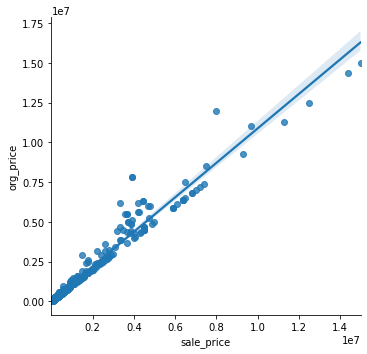

In [34]:
sns.lmplot(x="sale_price", y="org_price", data=df2)
plt.show()

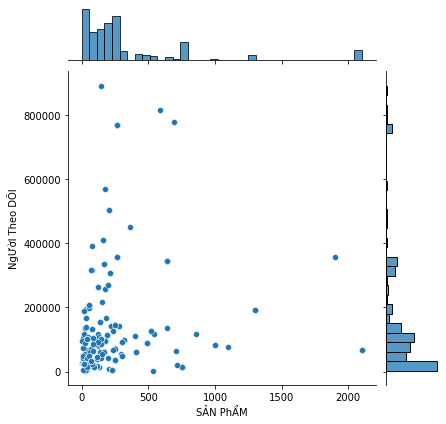

In [35]:
sns.jointplot(data=df2, x="SẢN PhẨM", y="NgƯờI Theo DÕI")
plt.show()

In [36]:
np.corrcoef(df2['Kho hàng'],df2['SẢN PhẨM'])

array([[ 1.        , -0.05024872],
       [-0.05024872,  1.        ]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


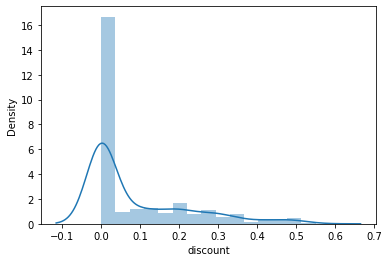

In [37]:
sns.distplot(df2['discount'])
plt.show()

Dựa vào biểu đồ, ta thấy đa số các sản phẩm không được giảm giá

In [38]:
Vi_tri_kho=df2['Gửi từ'].str.rsplit(",", expand=True)
Vi_tri_kho

,0,1
0,Quận Cầu Giấy,Hà Nội
1,Quận Hoàng Mai,Hà Nội
2,Quận Thủ Đức,TP. Hồ Chí Minh
3,Quận Phú Nhuận,TP. Hồ Chí Minh
4,Thành Phố Thái Nguyên,Thái Nguyên
...,...,...
498,Quận Hoàng Mai,Hà Nội
500,Quận Bình Tân,TP. Hồ Chí Minh
501,Quận Bình Tân,TP. Hồ Chí Minh
502,Quận Bình Tân,TP. Hồ Chí Minh


In [39]:
b=Vi_tri_kho.value_counts([1])[:5]
b

1               
 Hà Nội             241
 TP. Hồ Chí Minh    155
 Vĩnh Long           27
 Bình Dương          14
 Thừa Thiên Huế      10
dtype: int64

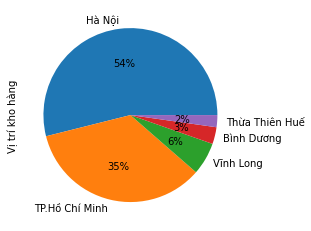

In [40]:
labels=['Hà Nội','TP.Hồ Chí Minh','Vĩnh Long','Bình Dương','Thừa Thiên Huế']
plt.pie(b,labels=labels,autopct='%.0f%%')
plt.ylabel('Vị trí kho hàng')
plt.show()

Dựa vào biểu đồ có thể thấy:
- Đa số các kho hàng tập trung tại khu vực Hà Nội (đến 54% số lượng kho)
- Kho hàng tại TPHCM chiếm 35% tổng số kho hàng
- Kế tiếp là các vị trí khác như Vĩnh Long, Bình Dương và Huế

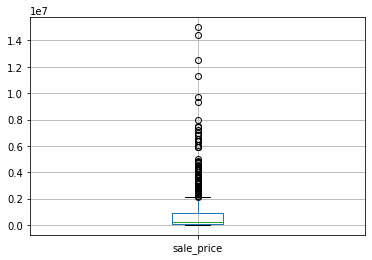

In [41]:
df2.boxplot(column=['sale_price'])
plt.show()

In [42]:
q1 = df2['sale_price'].quantile(0.25)
q3 = df2['sale_price'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

In [43]:
df_out = df2.loc[(df2['sale_price'] < fence_low) | (df2['sale_price'] > fence_high)]
df_out.head()

,Unnamed: 0,Tên sp:,label:,Danh Mục,Kho hàng,Gửi từ,sale_price,org_price,discount,star,rating,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI,NgƯờI Theo DÕI,Thương hiệu,Bảo Hành
4,4,Máy chiếu Led Salange M18-2020 1080P 15w đã sử...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",100,"Thành Phố Thái Nguyên, Thái Nguyên",3590000,5500000,0.35,0.0,0,0,34,37,0.93,68000.0,no brand,10 tháng
8,8,"Laptop New like Toshiba, hàng nhập khẩu",May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Laptop-Laptop Cũ,88,"Thành Phố Vĩnh Long, Vĩnh Long",3850000,4900000,0.21,0.0,0,0,62,266,0.99,357000.0,hp,2 tháng
14,14,"Chuyên game, laptop core i3 nhập khẩu, siêu bề...",May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Laptop-Laptop Chơi Game,99,"Thành Phố Vĩnh Long, Vĩnh Long",4450000,6300000,0.29,3.0,1,1,62,266,0.99,357000.0,no brand,3 tháng
15,15,Máy tính nhập khẩu từ Nhật -Laptop lenovo nguy...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Laptop-Laptop Cũ,49,"Thành Phố Vĩnh Long, Vĩnh Long",3850000,4400000,0.13,0.0,0,0,62,266,0.99,357000.0,lenovo,1 tháng
20,20,(Hàng nhập khẩu) Laptop nhập khẩu từ nhật bản ...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Laptop-Laptop Cũ,79,"Thành Phố Vĩnh Long, Vĩnh Long",3650000,5490000,0.34,0.0,0,0,4,167,1.00,61000.0,no brand,3 tháng


In [44]:
df2.drop(index=df_out.index, inplace=True)

In [45]:
df2.shape

(416, 18)

In [46]:
# df2 = df["Year"] + df["quarter"]
df2['Vị trí kho']=Vi_tri_kho[1]
df2.head(5)

,Unnamed: 0,Tên sp:,label:,Danh Mục,Kho hàng,Gửi từ,sale_price,org_price,discount,star,rating,selled,ĐáNh GiÁ,SẢN PhẨM,TỈ LỆ PhẢN HỒI,NgƯờI Theo DÕI,Thương hiệu,Bảo Hành,Vị trí kho
0,0,Sạc đa năng laptop,May_tinh_&_Laptop,Shopee-Máy tính & Laptop,100,"Quận Cầu Giấy, Hà Nội",115000,115000,0.00,0.0,0,0,41,127,1.00,15000.0,NaN,NaN,Hà Nội
1,1,Lót chuột - Pad chuột máy tính (11 họa tiết kh...,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Bàn D...",694,"Quận Hoàng Mai, Hà Nội",25000,25000,0.00,4.8,61,308,478,113,0.83,38000.0,no brand,Không Bảo Hành,Hà Nội
2,2,Chuột Dây Asus Sica Gaming P301,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Chuột, Bàn Phím-Chuột...",5,"Quận Thủ Đức, TP. Hồ Chí Minh",380000,590000,0.36,0.0,0,0,19,130,1.00,44000.0,asus,NaN,TP. Hồ Chí Minh
3,3,[PHÂN PHỐI] Bút thuyết trình chính hãng 1 đổi 1,May_tinh_&_Laptop,"Shopee-Máy tính & Laptop-Máy In, Máy Scan & Má...",49699,"Quận Phú Nhuận, TP. Hồ Chí Minh",299000,450000,0.34,5.0,1,301,51,8,0.86,105000.0,logitech,3 tháng,TP. Hồ Chí Minh
5,5,Cáp chuyển đổi Displayport sang VGA Unitek Y-5...,May_tinh_&_Laptop,Shopee-Máy tính & Laptop-Linh Kiện Máy Tính-Cá...,1,"Quận 11, TP. Hồ Chí Minh",250000,300000,0.17,0.0,0,0,687,266,0.90,769000.0,unitek,3 tháng,TP. Hồ Chí Minh


In [47]:
df2[['Vị trí kho','Thương hiệu', 'Kho hàng']].groupby(['Vị trí kho', 'Thương hiệu']).mean()

Kho hàng
Vị trí kho      Thương hiệu             
 An Giang       intel™       1112.000000
 Bắc Giang      mercury       244.000000
 Bắc Ninh       hp             50.000000
                lenovo        100.000000
 Hà Nội         acer            9.000000
...                                  ...
 Thừa Thiên Huế no brand      644.888889
 Vĩnh Long      no brand       99.000000
                tp-link        17.000000
 Đắk Lắk        lb-link        95.000000
 Đồng Nai       no brand      500.000000

[99 rows x 1 columns]

In [48]:
df2.groupby(['Vị trí kho', 'Thương hiệu'])['Kho hàng'].mean()

Vị trí kho       Thương hiệu
 An Giang        intel™         1112.000000
 Bắc Giang       mercury         244.000000
 Bắc Ninh        hp               50.000000
                 lenovo          100.000000
 Hà Nội          acer              9.000000
                                   ...     
 Thừa Thiên Huế  no brand        644.888889
 Vĩnh Long       no brand         99.000000
                 tp-link          17.000000
 Đắk Lắk         lb-link          95.000000
 Đồng Nai        no brand        500.000000
Name: Kho hàng, Length: 99, dtype: float64

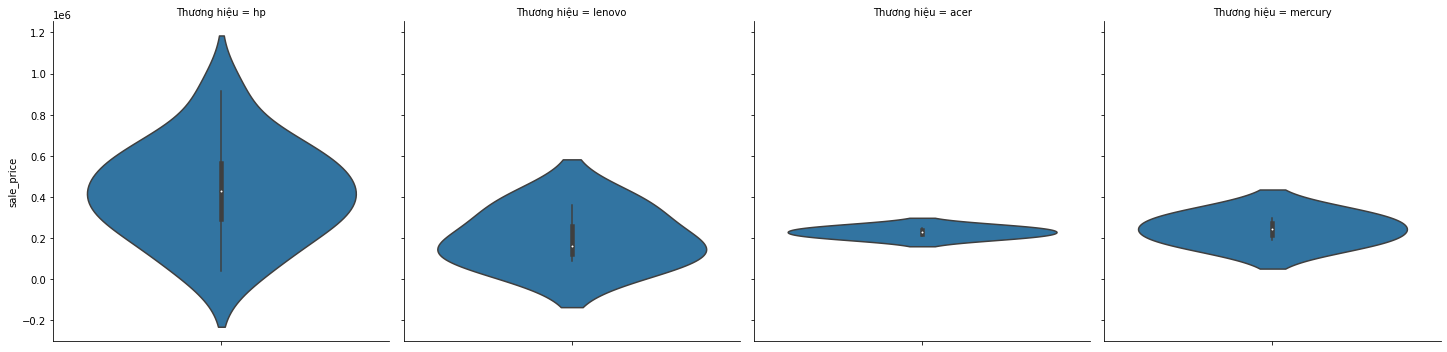

In [49]:
g = sns.catplot(y="sale_price", kind='violin', col='Thương hiệu', col_order=['hp','lenovo','acer','mercury'], data=df2)